<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/object_cactus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"977eb592f0fe57a4c97e7d050cf9c637"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
# List available datasets.
!kaggle datasets list

-rw-r--r-- 1 root root 64 Apr 24 06:59 kaggle.json
ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          33642  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          24211  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          23516  
mohansacharya/graduate-admissions                            Graduate Admissions                                   9KB  2018-12-28 10:07:14          19976  
lava18/

In [4]:
!kaggle competitions download -c aerial-cactus-identification

train.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!unzip train.zip -d destination_folder >& /dev/null
!unzip test.zip -d destination_folder >& /dev/nullz

N
N


In [0]:
import pandas as pd
import numpy as np
import os, sys
import pickle
import cv2 
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
from keras.preprocessing import image

labels = pd.read_csv('train.csv')
img_train = os.path.join('destination_folder/train')
img_test  = os.path.join('destination_folder/test/')


# LOAD AND READ IMAGE

In [0]:
img_df_train = [item for item in img_train]
img_df_test = [item for item in img_test]

In [0]:
def load_file(fileNames):
  return [os.path.join(fileNames,fileName) for fileName in os.listdir(fileNames)]
def resize(img):
  return cv2.resize(img , (32,32) , interpolation = cv2.INTER_AREA)

In [0]:
train_path = load_file(img_train)
test_path = load_file(img_test)

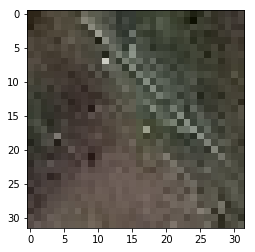

In [42]:
im= Image.open(train_path[0])
plt.imshow(im)

# PREPROCESSING IMAGE

In [0]:
X_train = [resize(plt.imread(train_path)) for train_path in train_path]
X_test = [resize(plt.imread(test_path)) for test_path in test_path]
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)


In [0]:
def save_data(file, fileName):
  with open(fileName, 'wb') as f:
    pickle.dump(file,f)
  f.close()
def open_data(file):
  with open(file,'rb') as f:
    file = pickle.load(f)
  return file

In [45]:
save_data(X_train,"trainDf")
save_data(X_test,"testDf")

NameError: ignored

In [0]:
file_train = open_data("trainDf")
file_test = open_data("testDf")


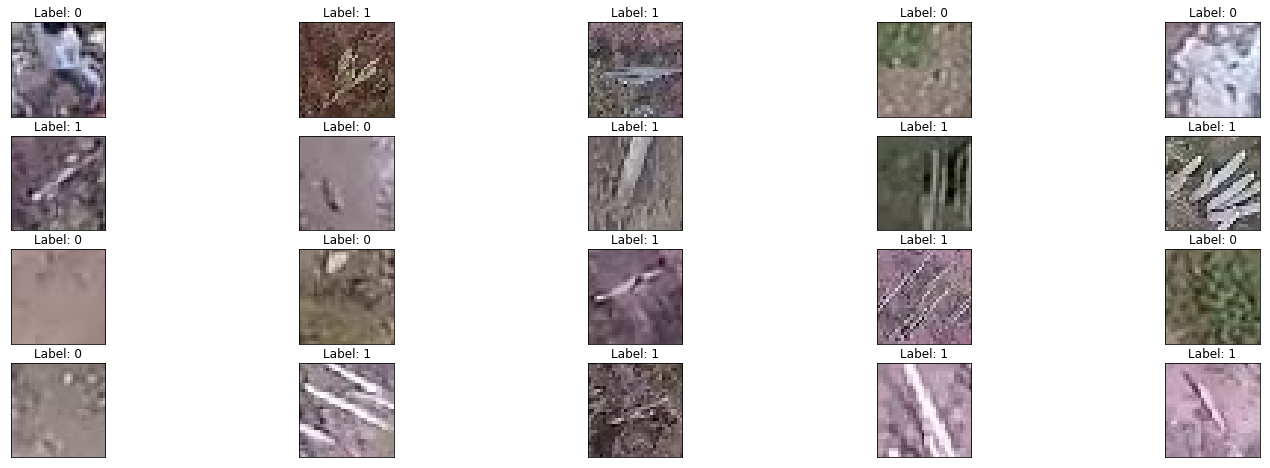

In [74]:
labels = pd.read_csv('train.csv')
fig = plt.figure(figsize= (25,8))
train_imgs = os.listdir('destination_folder/train/')
for index, img in enumerate(np.random.choice(train_imgs, 20)):
  ax = fig.add_subplot(4, 5, index+1, xticks =[], yticks =[])
  im = Image.open('destination_folder/train/'+img)
  plt.imshow(im)
  lab = labels.loc[labels['id']== img,'has_cactus'].values[0]
  ax.set_title(f'Label: {lab}')

  

In [0]:
y_lab = labels['id'].values

In [0]:
for idx,img in enumerate(y_lab):
  print(img)

In [0]:
for idx,img in enumerate(y_lab):
  print(img[0])

In [0]:
X_tr =[]
y_tr =[]
for idx,img in enumerate(y_lab):
  X_tr.append(cv2.imread('destination_folder/train/' + img))
  y_tr.append(labels[labels['id']== img]['has_cactus'].values[0])
X_tr = np.asarray(X_tr)
X_tr = X_tr.astype('float32')
X_tr /= 255
y_tr = np.asarray(y_tr)

In [122]:
print(X_tr[0])

[[[0.49019608 0.5411765  0.53333336]
  [0.48235294 0.53333336 0.5254902 ]
  [0.54901963 0.5803922  0.5803922 ]
  ...
  [0.5294118  0.5058824  0.59607846]
  [0.50980395 0.49019608 0.57254905]
  [0.54901963 0.5294118  0.6117647 ]]

 [[0.44313726 0.49411765 0.4862745 ]
  [0.5882353  0.6392157  0.6313726 ]
  [0.5921569  0.62352943 0.62352943]
  ...
  [0.57254905 0.54901963 0.6392157 ]
  [0.5137255  0.49411765 0.5764706 ]
  [0.5058824  0.4862745  0.5686275 ]]

 [[0.5882353  0.6392157  0.6313726 ]
  [0.58431375 0.63529414 0.627451  ]
  [0.5921569  0.62352943 0.62352943]
  ...
  [0.5254902  0.5058824  0.5882353 ]
  [0.5686275  0.54901963 0.6313726 ]
  [0.44313726 0.42352942 0.5058824 ]]

 ...

 [[0.47843137 0.43529412 0.5372549 ]
  [0.7137255  0.67058825 0.77254903]
  [0.37254903 0.33333334 0.42352942]
  ...
  [0.5764706  0.5176471  0.62352943]
  [0.5294118  0.4627451  0.5686275 ]
  [0.57254905 0.5058824  0.6117647 ]]

 [[0.5294118  0.4862745  0.5882353 ]
  [0.6039216  0.56078434 0.6627451 ]


In [0]:
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.models import Sequential
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation, Dense

In [143]:
print(X_tr.shape)
print(y_tr.shape)

(17500, 32, 32, 3)
(17500,)


In [0]:
def build_model():
  model = Sequential()
  model.add(Conv2D(64, input_shape=(32,32,3), kernel_size=(3,3), strides=2, padding='same'))
  model.add(MaxPooling2D((2,2), strides=2, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Conv2D(128, (3,3), strides=1,padding='same'))
  model.add(MaxPooling2D((2,2), strides=2, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Conv2D(256, (3,3), strides=1,padding='same'))
  model.add(MaxPooling2D((2,2), strides=2 , padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
            
  model.add(Conv2D(512, (3,3), strides=1,padding='same'))
  model.add(MaxPooling2D((2,2), strides=2 , padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.4))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.4))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = 'sigmoid'))
  
  return model

In [0]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))
vgg16_net.trainable = False


In [0]:
model1 = Sequential()
model1.add(vgg16_net)
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [0]:
model.fit(X_tr,y_tr, validation_split=0.1, batch_size = 128, epochs=50, verbose= 2, shuffle=True)

In [0]:
def VGGnet_16():
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), input_shape=(32,32,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [155]:
model = build_model()
model.compile(loss= 'binary_crossentropy',
              optimizer = optimizers.adam(lr= 0.0001),
             metrics=['accuracy'])
model.fit(X_tr,y_tr, validation_split=0.1, batch_size = 64, epochs=50, verbose= 2, shuffle=True)

Train on 15750 samples, validate on 1750 samples
Epoch 1/50
 - 11s - loss: 0.4144 - acc: 0.7903 - val_loss: 0.1924 - val_acc: 0.9417
Epoch 2/50
 - 3s - loss: 0.1522 - acc: 0.9448 - val_loss: 0.0731 - val_acc: 0.9754
Epoch 3/50
 - 3s - loss: 0.0902 - acc: 0.9686 - val_loss: 0.0659 - val_acc: 0.9783
Epoch 4/50
 - 3s - loss: 0.0645 - acc: 0.9815 - val_loss: 0.0468 - val_acc: 0.9846
Epoch 5/50
 - 3s - loss: 0.0479 - acc: 0.9865 - val_loss: 0.1671 - val_acc: 0.9640
Epoch 6/50
 - 3s - loss: 0.0359 - acc: 0.9895 - val_loss: 0.0935 - val_acc: 0.9817
Epoch 7/50
 - 3s - loss: 0.0277 - acc: 0.9935 - val_loss: 0.0725 - val_acc: 0.9829
Epoch 8/50
 - 3s - loss: 0.0219 - acc: 0.9948 - val_loss: 0.0581 - val_acc: 0.9846
Epoch 9/50
 - 3s - loss: 0.0233 - acc: 0.9929 - val_loss: 0.0712 - val_acc: 0.9823
Epoch 10/50
 - 3s - loss: 0.0157 - acc: 0.9957 - val_loss: 0.0762 - val_acc: 0.9834
Epoch 11/50
 - 3s - loss: 0.0177 - acc: 0.9952 - val_loss: 0.0696 - val_acc: 0.9863
Epoch 12/50
 - 3s - loss: 0.0424 - 

In [128]:
model = VGGnet_16()
model.compile(loss= 'binary_crossentropy',
              optimizer = optimizers.adam(lr= 0.00001),
             metrics=['accuracy'])
model.fit(X_tr,y_tr, validation_split=0.1, batch_size = 128, epochs=200, verbose= 2, shuffle=True)

Train on 15750 samples, validate on 1750 samples
Epoch 1/200
 - 13s - loss: 0.7315 - acc: 0.6952 - val_loss: 0.6584 - val_acc: 0.5669
Epoch 2/200
 - 7s - loss: 0.4723 - acc: 0.8020 - val_loss: 0.6879 - val_acc: 0.6166
Epoch 3/200
 - 7s - loss: 0.3243 - acc: 0.8720 - val_loss: 0.4615 - val_acc: 0.7977
Epoch 4/200
 - 7s - loss: 0.2547 - acc: 0.9055 - val_loss: 0.2880 - val_acc: 0.8903
Epoch 5/200
 - 7s - loss: 0.2215 - acc: 0.9200 - val_loss: 0.1977 - val_acc: 0.9297
Epoch 6/200
 - 7s - loss: 0.2017 - acc: 0.9252 - val_loss: 0.1903 - val_acc: 0.9309
Epoch 7/200
 - 7s - loss: 0.1926 - acc: 0.9255 - val_loss: 0.1696 - val_acc: 0.9451
Epoch 8/200
 - 7s - loss: 0.1822 - acc: 0.9288 - val_loss: 0.1506 - val_acc: 0.9474
Epoch 9/200
 - 7s - loss: 0.1783 - acc: 0.9341 - val_loss: 0.1465 - val_acc: 0.9531
Epoch 10/200
 - 7s - loss: 0.1658 - acc: 0.9370 - val_loss: 0.1427 - val_acc: 0.9531
Epoch 11/200
 - 7s - loss: 0.1593 - acc: 0.9394 - val_loss: 0.1232 - val_acc: 0.9589
Epoch 12/200
 - 7s - los

KeyboardInterrupt: ignored

In [0]:
with open('model.json', 'w') as f:
    json.dump(model.data, f)

model = pd.DataFrame(model.data)
model[['loss', 'val_loss']].plot()
model[['acc', 'val_acc']].plot()

In [0]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [0]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)
model.layers.pop()
for layer in model.layers:
  layer.trainable = False

# Flatten model
model.add(Flatten())

# Add dense layer
model.add(Dense(1, activation = 'softmax'))

In [0]:
adam = keras.optimizers.Adam(lr = 0.001)

In [0]:
model.compile(loss= 'binary_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])
model.fit(X_train, y, validation_split=0.2, epochs=50, batch_size=256, verbose=2)

Train on 14000 samples, validate on 3500 samples
Epoch 1/50


InternalError: ignored